In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
from six import StringIO  
import requests
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from random import uniform as random_uniform
import warnings
from socket import socket
import re
import io
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


P-type semiconductor 

[204, 205]
898
900
376.65


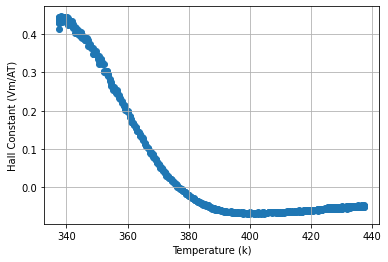

In [ ]:
#T vs t
Tpath1  = '/content/drive/MyDrive/p-type material/Measure Ix, B = 0, Vh, Vdrop, Vheater Test 1(!).txt'
Tpath2 = '/content/drive/MyDrive/p-type material/Measure Ix, B = 0, Vh, Vdrop, Vheater Test 1b 2min(!).txt'
Tpath3 = '/content/drive/MyDrive/p-type material/Measure Ix, B = 137.4, Vh, Vdrop, Vheater Test 4 1.5min 100ms(!).txt'
Tpath4 = '/content/drive/MyDrive/p-type material/Measure Ix, B = 48, Vh, Vdrop, Vheater Test 2 1.5min 100ms(!).txt'
Tpath5 = '/content/drive/MyDrive/p-type material/Measure Ix, B = 92.3, Vh, Vdrop, Vheater Test 3 1.5min 100ms(!).txt'
Tdata1 = pd.read_csv(Tpath1, delim_whitespace = True, header=None, names = ['Time(min)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Tdata2 = pd.read_csv(Tpath2, delim_whitespace = True, header=None, names = ['Time(min)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Tdata3 = pd.read_csv(Tpath3, delim_whitespace = True, header=None, names = ['Time(min)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Tdata4 = pd.read_csv(Tpath4, delim_whitespace = True, header=None, names = ['Time(min)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Tdata5 = pd.read_csv(Tpath5, delim_whitespace = True, header=None, names = ['Time(min)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])

def temp(x):
  t = []
  for i in range(len(x)):
    x1 = x[i]*100
    y = x1 + 273.15
    t.append(y)
  return t

def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))
  return G1

R = []
b51 = fix(Tdata5['Voltage U_B1(V)'])

for n in range(len(b51)):
  x = np.log(b51[n]/4)
  R.append(x)

e = 1.60217662*10**(-19)
a31 = fix(Tdata5['Hall Voltage(V)'])
a32 = fix(Tdata5['Current(A)'])
a41 = fix(Tdata5['Magn. flux density(mT)'])
a51 = temp(fix(Tdata5['Voltage U_A2(V)']))

T_1= []
for j in range(len(a51)):
  y = 1/a51[j]
  T_1.append(y)

entry = []
for j in range(len(a51)):
  if 410<a51[j]<411:
    entry.append(j)


RH = []
prob = []
for k in range(len(a31)):
  x = a31[k]/(a32[k]*a41[k])
  RH.append(x)
  if x == 0:
    prob.append(k)
    RH.remove(x)

print(prob)
a51.remove(a51[204])
a51.remove(a51[205])
print(len(a51))
print(len(Tdata5['Voltage U_A2(V)']))

n = []
for u in range(len(a51)):
  y = 1/(e*RH[u])
  n.append(y)
print(a51[204])
plt.scatter(a51, RH)
plt.grid()
plt.xlabel('Temperature (k)')
plt.ylabel('Hall Constant (Vm/AT)')
plt.show()



9
9
m =  -0.0002969106749304718
b =  -3.758489686242682e-05


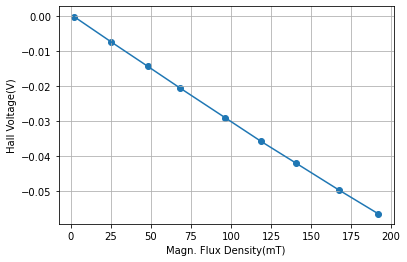

0       1,96
1       1,99
2      2,025
3      1,975
4      1,985
       ...  
496     2,02
497    2,005
498     2,03
499    1,995
500     2,03
Name: Magn. flux density(mT), Length: 501, dtype: object


In [ ]:
#Vh vs B
import statistics


Vpath1 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 1(!).txt'
Vpath2 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 2(!).txt'
Vpath3 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 3(!).txt'
Vpath4 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 4(!).txt'
Vpath5 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 5(!).txt'
Vpath6 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 6(!).txt'
Vpath7 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 7(!).txt'
Vpath8 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 8(!).txt'
Vpath9 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 9.txt'
Vpath10 = '/content/drive/MyDrive/p-type material/Measure B/Measure Ix, B, Vh and Vdrop Test 10(!).txt'


Vdata1 = pd.read_csv(Vpath1, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata2 = pd.read_csv(Vpath2, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata3 = pd.read_csv(Vpath3, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata4 = pd.read_csv(Vpath4, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata5 = pd.read_csv(Vpath5, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata6 = pd.read_csv(Vpath6, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata7 = pd.read_csv(Vpath7, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata8 = pd.read_csv(Vpath8, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata9 = pd.read_csv(Vpath9, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])
Vdata10 = pd.read_csv(Vpath10, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)', 'Voltage U_A2(V)'])

def mean(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))

  return statistics.mean(G1)


def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))

  return G1


def error(x):
  return ((max(x)-min(x))/2)



B = [mean(Vdata1['Magn. flux density(mT)']), mean(Vdata2['Magn. flux density(mT)']), mean(Vdata3['Magn. flux density(mT)']),
mean(Vdata4['Magn. flux density(mT)']), mean(Vdata5['Magn. flux density(mT)']), mean(Vdata6['Magn. flux density(mT)']),
mean(Vdata7['Magn. flux density(mT)']), mean(Vdata8['Magn. flux density(mT)']), mean(Vdata9['Magn. flux density(mT)'])]

errB = [error(fix(Vdata1['Magn. flux density(mT)'])), error(fix(Vdata2['Magn. flux density(mT)'])), error(fix(Vdata3['Magn. flux density(mT)'])),
        error(fix(Vdata4['Magn. flux density(mT)'])), error(fix(Vdata5['Magn. flux density(mT)'])), error(fix(Vdata6['Magn. flux density(mT)'])), 
        error(fix(Vdata7['Magn. flux density(mT)'])), error(fix(Vdata8['Magn. flux density(mT)'])), error(fix(Vdata9['Magn. flux density(mT)']))]

Vh = [mean(Vdata1['Hall Voltage(V)']), mean(Vdata2['Hall Voltage(V)']), mean(Vdata3['Hall Voltage(V)']),
      mean(Vdata4['Hall Voltage(V)']), mean(Vdata5['Hall Voltage(V)']), mean(Vdata6['Hall Voltage(V)']),
      mean(Vdata7['Hall Voltage(V)']), mean(Vdata8['Hall Voltage(V)']), mean(Vdata9['Hall Voltage(V)'])]

errVh = [error(fix(Vdata1['Hall Voltage(V)'])), error(fix(Vdata2['Hall Voltage(V)'])), error(fix(Vdata3['Hall Voltage(V)'])), 
         error(fix(Vdata4['Hall Voltage(V)'])), error(fix(Vdata5['Hall Voltage(V)'])), error(fix(Vdata6['Hall Voltage(V)'])),
         error(fix(Vdata7['Hall Voltage(V)'])), error(fix(Vdata8['Hall Voltage(V)'])), error(fix(Vdata9['Hall Voltage(V)']))]

testerr = 9*[0.1]
vx = []
print(len(B))
print(len(Vh))

m, b = np.polyfit(B, Vh, 1)
print('m = ', m)
print('b = ', b)

for j in range(1,len(Vh)):
  x = -Vh[j]/B[j]
  vx.append(x)

plt.scatter(B, Vh)
plt.errorbar(B, Vh, xerr = errB, yerr= errVh)
plt.xlabel('Magn. Flux Density(mT)')
plt.ylabel('Hall Voltage(V)')

plt.grid()
plt.show()
print(Vdata1['Magn. flux density(mT)'])

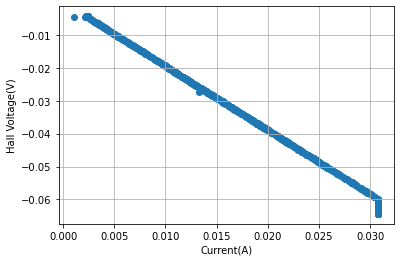

In [ ]:
#Vh vs I

Ipath1 = '/content/drive/MyDrive/p-type material/Vh vs I/Measure Ix, B = 0, Vh and Vdrop Test 1(!).txt'
Ipath2 = '/content/drive/MyDrive/p-type material/Vh vs I/Measure Ix, B = max, Vh and Vdrop Test 2(!).txt'
Ipath3 = '/content/drive/MyDrive/p-type material/Vh vs I/Measure Ix, B = 0, Vh and Vdrop Test 3(!).txt'

Idata1 = pd.read_csv(Ipath1, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)'])
Idata2 = pd.read_csv(Ipath2, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)'])
Idata3 = pd.read_csv(Ipath3, delim_whitespace = True, header=None, names = ['Time(s)', 'Current(A)', 'Magn. flux density(mT)', 'Hall Voltage(V)', 'Voltage U_B1(V)'])

def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))
  return G1

I1 = fix(Idata2['Current(A)'])
I2 = fix(Idata2['Hall Voltage(V)'])

plt.scatter(I1, I2)
plt.xlabel('Current(mA)')
plt.ylabel('Hall Voltage(V)')
plt.grid()
plt.show()

N-type semiconductors 

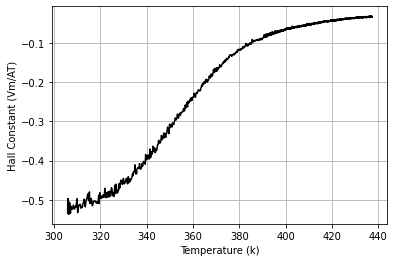

In [ ]:
#T vs t
p11 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/T vs t/Measuring Ix, B-0 , Vh, Vdrop and Vheater Test 1 2min-100ms.txt'
p12 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/T vs t/Measuring Ix, B-0 , Vh, Vdrop and Vheater Test 1 5min-500ms(full spectrum).txt'
p1b = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/T vs t/Measuring Ix, B-0 , Vh, Vdrop and Vheater Test 1b 2min-100ms.txt'
p2 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/T vs t/Measuring Ix, B-51 , Vh, Vdrop and Vheater Test 2 2min-100ms.txt'
p4  ='/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/T vs t/Measuring Ix, B-154.6 , Vh, Vdrop and Vheater Test 4  3min-100ms.txt'
p3 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/T vs t/Measuring Ix, B-100.3 , Vh, Vdrop and Vheater Test 3 3min-100ms.txt'
p5 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/T vs t/Measuring Ix, B-201.2 , Vh, Vdrop and Vheater Test  5  3min-100ms.txt'

Td11 = pd.read_csv(p11, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Td12 = pd.read_csv(p12, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Td1b = pd.read_csv(p1b, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)']) 
Td2 = pd.read_csv(p2, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Td3 = pd.read_csv(p3, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Td4 = pd.read_csv(p4, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Td5 = pd.read_csv(p5, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])

def temp(x):
  t = []
  for i in range(len(x)):
    x1 = x[i]*100
    y = x1 + 273.15
    t.append(y)
  return t

def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))
    if type(G[i])==float:
      G1.append(G[i])
  return G1

a11 = fix(Td3['Hall Voltage(V)'])
a12 = fix(Td3['Current(A)'])
a13 = fix(Td3['Magn. flux density(mT)'])

RH = []
for l in range(len(a12)):
  RH.append(a11[l]/(a12[l]*a13[l]))




entry = []

T_2 = []

for l in range(len(a51)):
  o = 1/a51[l]
  T_2.append(o)


R_1 = []



plt.plot(temp(fix(Td3['Voltage U_A2(V)'])), RH, 'k')
plt.xlabel('Temperature (k)')
plt.ylabel('Hall Constant (Vm/AT)')
plt.grid()
plt.show()

m =  0.00029291352779551444
b =  -0.00324028077451735
m2 =  0.0002902512751058549
b2 =  -0.0006803655539307674


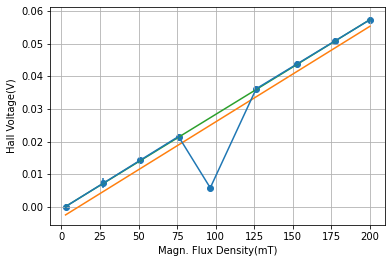

In [ ]:
# Vh vs B 
import statistics
Vpc = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/Vh vs B/Measuring Ix, B , Vh and Vdrop Test alt 5s-10ms - find original conductivity.txt'
Vp1 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 1.txt'
Vp2 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 2 5s-10ms.txt'
Vp3 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 3 5s-10ms.txt'
Vp4  = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 4 5s-10ms.txt'
Vp5 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 5 5s-10ms.txt'
Vp6 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 6 5s-10ms.txt'
Vp7 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 7 5s-10ms.txt'
Vp8 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 8 5s-10ms.txt'
Vp9 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 9 5s-10ms.txt'
Vp10  = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 10 5s-10ms.txt'

Vdc = pd.read_csv(Vpc, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd1 = pd.read_csv(Vp1, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd2 = pd.read_csv(Vp2, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd3 = pd.read_csv(Vp3, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd4 = pd.read_csv(Vp4, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd5 = pd.read_csv(Vp5, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd6 = pd.read_csv(Vp6, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd7 = pd.read_csv(Vp7, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)']) 
Vd8 = pd.read_csv(Vp8, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd9 = pd.read_csv(Vp9, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd10 = pd.read_csv(Vp10, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])

def mean(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))

  return statistics.mean(G1)

def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))

  return G1



B2 = [mean(Vd1['Magn. flux density(mT)']), mean(Vd2['Magn. flux density(mT)']), mean(Vd3['Magn. flux density(mT)']),
mean(Vd4['Magn. flux density(mT)']), mean(Vd5['Magn. flux density(mT)']), mean(Vd6['Magn. flux density(mT)']),
 mean(Vd7['Magn. flux density(mT)']), mean(Vd8['Magn. flux density(mT)']), mean(Vd9['Magn. flux density(mT)'])]

Vh2 = [mean(Vd1['Hall Voltage(V)']), mean(Vd2['Hall Voltage(V)']), mean(Vd3['Hall Voltage(V)']),
      mean(Vd4['Hall Voltage(V)']), mean(Vd5['Hall Voltage(V)']), mean(Vd6['Hall Voltage(V)']),
       mean(Vd7['Hall Voltage(V)']), mean(Vd8['Hall Voltage(V)']), mean(Vd9['Hall Voltage(V)'])]

def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))

  return G1


def error(x):
  return ((max(x)-min(x))/2)


errB2 = [error(fix(Vd1['Current(A)'])), error(fix(Vd2['Current(A)'])), error(fix(Vd3['Current(A)'])),
error(fix(Vd4['Current(A)'])), error(fix(Vd5['Current(A)'])), error(fix(Vd6['Current(A)'])), 
error(fix(Vd7['Current(A)'])), error(fix(Vd8['Current(A)'])), error(fix(Vd9['Current(A)']))]

errVh2 = [error(fix(Vd1['Voltage U_B1(V)'])), error(fix(Vd2['Voltage U_B1(V)'])), error(fix(Vd3['Voltage U_B1(V)'])),
error(fix(Vd4['Voltage U_B1(V)'])), error(fix(Vd5['Voltage U_B1(V)'])), error(fix(Vd6['Voltage U_B1(V)'])),
error(fix(Vd7['Voltage U_B1(V)'])), error(fix(Vd8['Voltage U_B1(V)'])), error(fix(Vd9['Voltage U_B1(V)']))]


vx = []
for k in range(1,len(B2)):
  x = -Vh2[k]/B2[k]
  vx.append(x)

m, b = np.polyfit(B2, Vh2, 1)
print('m = ', m)
print('b = ', b)

x2 = [min(B2), max(B2)]
y2 = [min(Vh2), max(Vh2)]

m2, b2 = np.polyfit(x2, y2, 1)

q = np.linspace(min(B2), max(B2))
w = m*q + b
w2 = m2*q + b2

print('m2 = ', m2)
print('b2 = ', b2)
plt.scatter(B2, Vh2)
plt.errorbar(B2, Vh2, xerr = errB2, yerr = errVh2)
plt.plot(q, w)
plt.plot(q, w2)
plt.xlabel('Magn. Flux Density(mT)')
plt.ylabel('Hall Voltage(V)')

plt.grid()
plt.show()




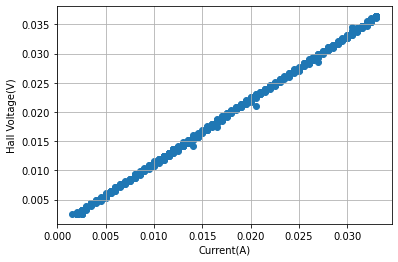

In [ ]:
# Vh vs I
Ip1 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/Vh vs I/Measuring Ix, B , Vh and Vdrop Test 1 10s-10ms.txt'
Ip2 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/Vh vs I/Measuring Ix, B-med , Vh and Vdrop Test 2 10s-10ms.txt'
Ip3  = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/Vh vs I/Measuring Ix, B-max , Vh and Vdrop Test 3 10s-10ms.txt'

Id1 = pd.read_csv(Ip1, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)' 'Voltage U_A2(V)'])
Id2 = pd.read_csv(Ip2, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)' 'Voltage U_A2(V)'])
Id3  = pd.read_csv(Ip3, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)' 'Voltage U_A2(V)'])

def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))
  return G1

J1 = fix(Id2['Current(A)'])
J2 = fix(Id2['Hall Voltage(V)'])

plt.scatter(J1, J2)
plt.xlabel('Current(A)')
plt.yabel('Hall Voltage(V)')
plt.grid()
plt.show()

In [ ]:
import statistics
Vpc = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files)/n-type material - Copy/Vh vs B/Measuring Ix, B , Vh and Vdrop Test alt 5s-10ms - find original conductivity.txt'
Vp1 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 1.txt'
Vp2 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 2 5s-10ms.txt'
Vp3 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 3 5s-10ms.txt'
Vp4  = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 4 5s-10ms.txt'
Vp5 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 5 5s-10ms.txt'
Vp6 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 6 5s-10ms.txt'
Vp7 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 7 5s-10ms.txt'
Vp8 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 8 5s-10ms.txt'
Vp9 = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 9 5s-10ms.txt'
Vp10  = '/content/drive/MyDrive/n-type material - Copy.zip (Unzipped Files) (1)/n-type material - Copy/Vh vs B/Measuring Ix, B, Vh and Vdrop Test 10 5s-10ms.txt'

Vdc = pd.read_csv(Vpc, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd1 = pd.read_csv(Vp1, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd2 = pd.read_csv(Vp2, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd3 = pd.read_csv(Vp3, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd4 = pd.read_csv(Vp4, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd5 = pd.read_csv(Vp5, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd6 = pd.read_csv(Vp6, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd7 = pd.read_csv(Vp7, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)']) 
Vd8 = pd.read_csv(Vp8, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd9 = pd.read_csv(Vp9, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])
Vd10 = pd.read_csv(Vp10, delim_whitespace = True, header=None, names = ['Time(min)', 'Magn. flux density(mT)','Current(A)', 'Voltage U_B1(V)',  'Hall Voltage(V)', 'Voltage U_A2(V)'])


def fix(a):
  G = a
  G1 = []

  for i in range(len(G)):
    if type(G[i]) == int:
      G1.append(G[i])
    if type(G[i]) == str:
      G1.append(float(G[i].replace(',','.')))

  return G1

a = fix(Vd1['Magn. flux density(mT)'])
B = [statistics.mean(fix(Vd1['Magn. flux density(mT)'])), statistics.mean(fix(Vd2['Magn. flux density(mT)'])), statistics.mean(fix(Vd3['Magn. flux density(mT)'])),
    statistics.mean(fix(Vd4['Magn. flux density(mT)'])), statistics.mean(fix(Vd5['Magn. flux density(mT)'])), statistics.mean(fix(Vd6['Magn. flux density(mT)'])), 
    statistics.mean(fix(Vd7['Magn. flux density(mT)'])), statistics.mean(fix(Vd8['Magn. flux density(mT)'])), statistics.mean(fix(Vd9['Magn. flux density(mT)'])),
    statistics.mean(fix(Vd10['Magn. flux density(mT)']))]

print(fix(Vd1['Hall Voltage(V)']))

[0.00015, 5e-05, 0.00015, 5e-05, 0.0001, 5e-05, 0.00015, 5e-05, 0.00015, 5e-05, 0.0001, 5e-05, 0.0001, 5e-05, 0.0001, 5e-05, 0.00015, 0.0, 0.00015, 0.0001, 0.0001, 5e-05, 0.0001, 5e-05, 0.0001, 5e-05, 0.00015, 5e-05, 0.0001, 5e-05, 0.0001, 5e-05, 0.0002, 5e-05, 0.0001, 0.0001, 0.00015, 5e-05, 0.00015, 5e-05, 0.00015, 5e-05, 0.00015, 5e-05, 0.00015, 0.0001, 0.00015, 5e-05, 0.00015, 5e-05, 0.0001, 5e-05, 0.00015, 0.0001, 0.0001, 5e-05, 0.0001, 0.0, 0.0001, 5e-05, 0.0001, 5e-05, 0.00015, 0.0, 0.00015, 5e-05, 0.0001, 0.0, 0.0001, 0.0, 0.00015, 5e-05, 0.0001, 5e-05, 0.0001, 5e-05, 0.00015, 5e-05, 0.0001, 5e-05, 0.00015, 5e-05, 0.0001, 0.0, 0.0001, 5e-05, 0.0001, 0.0, 0.0001, 5e-05, 0.0002, 5e-05, 0.0001, 5e-05, 0.00015, 5e-05, 0.0001, 5e-05, 0.0001, 0.0001, 0.0001, 5e-05, 0.0001, 5e-05, 0.0001, 0.0, 0.00015, 5e-05, 0.0001, 0.0, 0.0001, 0.0, 0.00015, 5e-05, 0.0001, 5e-05, 0.0001, 0.0, 0.0001, 5e-05, 0.00015, 5e-05, 0.00015, 5e-05, 0.0001, 5e-05, 0.0001, 0.0001, 0.00015, 5e-05, 0.0001, 0.0001